<a href="https://colab.research.google.com/github/ravikiran232/titanic-prediction/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df=pd.read_csv("/content/train_data.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
len(df['Ticket'].unique())

681

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

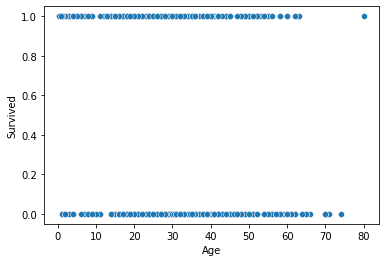

In [ ]:
sns.scatterplot(x='Age',y='Survived',data=df)

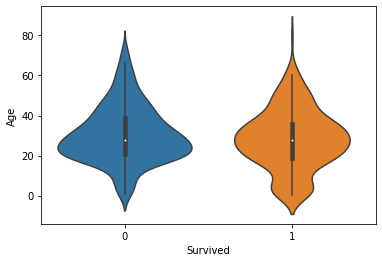

In [ ]:
sns.violinplot(y=df['Age'],x=df['Survived'])

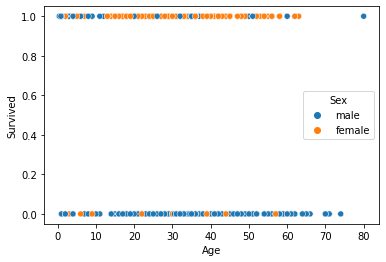

In [ ]:
sns.scatterplot(x='Age',y='Survived',data=df,hue='Sex')

In [ ]:
# gender is a dominating feature in prediction because mostly female has survived

In [ ]:
df1=df[df['Embarked']=='S']
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
df['Embarked'].fillna('S',inplace=True)

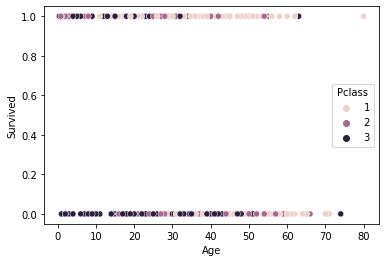

In [ ]:
sns.scatterplot(x='Age',y='Survived',data=df,hue='Pclass')

In [ ]:
#mostly 3rd class passengers not survived so Pclass is also important feature

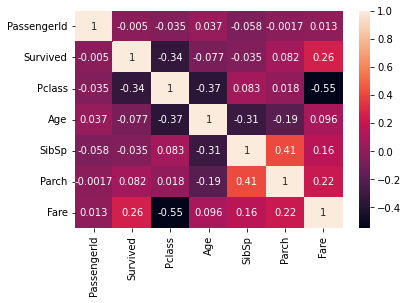

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df=df.drop(['Fare','PassengerId','Name','Ticket','Cabin'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
df.iloc[:,[3]]
imputer.fit(df.iloc[:,[3]])
x=imputer.transform(df.iloc[:,[3]])
df.iloc[:,[3]]=x

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


In [ ]:
df['Sex'].replace('male',1,inplace=True)
df['Sex'].replace('female',2,inplace=True)
df['Embarked'].replace('S',1,inplace=True)
df['Embarked'].replace('Q',2,inplace=True)
df['Embarked'].replace('C',3,inplace=True)

In [ ]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x_train=x[:700]
y_train=y[:700]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
reg_log=LogisticRegression()
reg_kn=KNeighborsClassifier()
reg_random=RandomForestClassifier()
reg_log.fit(x_train,y_train)
reg_kn.fit(x_train,y_train)
reg_random.fit(x_train,y_train)
print(reg_log.score(x[700:891],y[700:891])," ",reg_kn.score(x[700:891],y[700:891])," ",reg_random.score(x[700:891],y[700:891]))

0.8272251308900523   0.7958115183246073   0.8534031413612565


In [ ]:
# we can see randomforest classifier has highest score we will use randomforestclassifier for further steps

In [ ]:
import numpy as np
random_reg={"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}
# we will use first RandomisedSearchCV
reg_ran=RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = random_reg,
                           cv = 5,
                           n_iter = 20,
                           verbose =True)
reg_ran.fit(x_train,y_train)
reg_ran.best_params_
reg_ran.score(x[700:891],y[700:891])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8743455497382199

In [ ]:
df_test=pd.read_csv('test_data.csv')
df_test.head()
df_test['Sex'].replace('male',1,inplace=True)
df_test['Sex'].replace('female',2,inplace=True)
df_test['Embarked'].replace('S',1,inplace=True)
df_test['Embarked'].replace('Q',2,inplace=True)
df_test['Embarked'].replace('C',3,inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",2,39.0,0,0,PC 17758,108.9000,C105,3
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,1


In [ ]:
x_predict=df_test.drop(['Fare','PassengerId','Name','Ticket','Cabin'],axis=1)
x_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Pclass    418 non-null    int64
 1   Sex       418 non-null    int64
 2   SibSp     418 non-null    int64
 3   Parch     418 non-null    int64
 4   Embarked  418 non-null    int64
dtypes: int64(5)
memory usage: 16.5 KB


In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
x_predict.iloc[:,[2]]
imputer.fit(x_predict.iloc[:,[2]])
x_values=imputer.transform(x_predict.iloc[:,[2]])
x_predict.iloc[:,[2]]=x_values

In [ ]:
y_predict=reg_ran.predict(x_predict)

In [ ]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
data={'PassengerId':df_test['PassengerId'],'Survived':y_predict}
df2=pd.DataFrame(data,columns=['PassengerId','Survived'])
df2.to_csv('prediction_data_titanic2.CSV',index=False)
df2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
